## Jupyter Python notebook attached to  Treetagger for POS-tagging paper

#### Authors:

<b>Hamady GACKOU</b>, MSc student in Data Science and  machine learning at Université Paris Cité (<a href="mailto: hamady.gackou@etu.u-paris.fr">hamady.gackou@etu.u-paris.fr</a>).<br>

<b>Nicolas BALLIER</b>, Full professor of linguistics at Université Paris Cité (<a href="mailto: nicolas.ballier@u-paris.fr">nicolas.ballier@u-paris.fr</a>).<br>

## Lab Objectives

1. **Execution of TreeTagger**: Analyze the different realizations of the word *that* (e.g., as adverb, relative pronoun, conjunction, etc.) and measure precision for each category.
2. **Retraining TreeTagger**: Use a specific tagset to distinguish the various uses of *that*.
3. **Comparative Analysis**: Compare the performance of the *Penn* and *BNC* models in TreeTagger.
4. **Precision and Recall**: Evaluate the precision and recall for annotating *that* using training and test corpora.

## We  will  import for the first step  the  required bibliothec 

In [1]:
import os
import subprocess
import pandas as pd
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import nltk
from collections import defaultdict
import warnings
import treetaggerwrapper
import seaborn as sns
import conllu
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import brown

# Ignorer les warnings spécifiques
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=SyntaxWarning)

c:\Users\MLSD\Desktop\Projects_Folder\DataScience2_NLP\Projet_NLP\venv\Lib\site-packages\treetaggerwrapper.py:741: FutureWarning: Possible nested set at position 8
  punct2find_re = re.compile("([^ ])([[" + ALONEMARKS + "])",
c:\Users\MLSD\Desktop\Projects_Folder\DataScience2_NLP\Projet_NLP\venv\Lib\site-packages\treetaggerwrapper.py:2045: FutureWarning: Possible nested set at position 152
  DnsHostMatch_re = re.compile("(" + DnsHost_expression + ")",
c:\Users\MLSD\Desktop\Projects_Folder\DataScience2_NLP\Projet_NLP\venv\Lib\site-packages\treetaggerwrapper.py:2069: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
c:\Users\MLSD\Desktop\Projects_Folder\DataScience2_NLP\Projet_NLP\venv\Lib\site-packages\treetaggerwrapper.py:2081: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)


## 1. TreeTagger for POS-tagging
*TreeTagger* is a linguistic annotation tool that uses a probabilistic model to predict the POS categories of words in a text.

### Steps:

1. **Installation of TreeTagger**
   - Download and install *TreeTagger* by following the instructions on the official website: [TreeTagger](https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/).
   - Ensure that Java and Perl are installed on your machine.

2. **Execution of TreeTagger**
   - Use test files to analyze the different realizations of *that*. For instance, in *BNC.par* or *Penn.par*, the word *that* should be tagged according to its specific role:
     - As an adverb (RB),
     - As a relative pronoun (WPR), or
     - As a conjunction (CJT).

3. **Testing Different Configurations**
   - Test various *TreeTagger* configurations with distinct parameter files to observe the precision of annotations obtained.
   - Example:
     ```bash
     ./tree-tagger English.par textfile.txt
     ```
     - Replace `English.par` with the desired parameter file (e.g., `penn.par` or `bnc.par`).
     - **Precision**: Compare the precision of each realization based on different test sets.

4. **Compare Penn and BNC Models** (Bonus)
   - Using *penn.par* and *bnc.par* parameter files, compare *TreeTagger*'s performance in annotating *that* in various contexts.
     - **Penn Model**: [Penn Treebank Tagset](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)
     - **BNC Model**: [BNC Tagset](http://ucrel.lancs.ac.uk/claws5tags.html)

### Expected Output:
- Precision of annotated realizations for each category: Adverb (RB), Conjunction (CJT), Relative Pronoun (WPR).

Here  we  will tokenize the tests data to the  specific format expected by  TreeTagger 

In [2]:
def tokenize_file(input_file_path, output_file_path):
    """
    Tokenizes the content of a file, splitting it by spaces, and writes the tokens to a new file.
    
    Parameters:
    - input_file_path (str): Path to the input file.
    - output_file_path (str): Path to the output file where the tokenized content will be saved.
    """
    try:
        with open(input_file_path, "r", encoding="utf-8") as fo:
            content = fo.read()
            tokens = content.split(" ")
        
        with open(output_file_path, "w+", encoding="utf-8") as fo_tokenized:
            for token in tokens:
                fo_tokenized.write(token + "\n")
                
        print(f"Tokenization complete! Tokens saved to {output_file_path}.")
    
    except Exception as e:
        print(f"An error occurred: {e}")
        

        
# Using the above function to  tokenize the tests data :
tokenize_file("testing_sets/NNC_test_text.txt", "testing_sets/NNC_tokenized.txt")
tokenize_file("testing_sets/that_adv.txt", "testing_sets/that_adv_tokenized.txt")
tokenize_file("testing_sets/that_determiner.txt", "testing_sets/that_determiner_tokenized.txt")
tokenize_file("testing_sets/that_pronoun.txt", "testing_sets/that_pronoun_tokenized.txt")
tokenize_file("testing_sets/that_conjunction.txt", "testing_sets/that_conjunction_tokenized.txt")

Tokenization complete! Tokens saved to testing_sets/NNC_tokenized.txt.
Tokenization complete! Tokens saved to testing_sets/that_adv_tokenized.txt.
Tokenization complete! Tokens saved to testing_sets/that_determiner_tokenized.txt.
Tokenization complete! Tokens saved to testing_sets/that_pronoun_tokenized.txt.
Tokenization complete! Tokens saved to testing_sets/that_conjunction_tokenized.txt.


***Now , we can compute TreeTagger Penn Tree bank  on our tests data***

In [3]:
!tree-tagger -token penn.par testing_sets/NNC_tokenized.txt tests_results/results_that_NNC_penn.txt
!tree-tagger -token penn.par testing_sets/that_adv_tokenized.txt tests_results/results_that_adv_penn.txt
!tree-tagger -token penn.par testing_sets/that_determiner_tokenized.txt tests_results/results_that_determiner_penn.txt
!tree-tagger -token penn.par testing_sets/that_pronoun_tokenized.txt tests_results/results_that_pronoun_penn.txt
!tree-tagger -token penn.par testing_sets/that_conjunction_tokenized.txt tests_results/results_that_conjunction_penn.txt

	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.


We will now compute  the accuracy for treetagger executions  above and display it 

{'results_that_NNC_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 199, 'n_CJT': 0, 'n_DT': 1, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_adv_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 38, 'n_CST': 0, 'n_IN': 49, 'n_CJT': 0, 'n_DT': 12, 'n_RB': 1, 'n_VB': 0, 'n_MD': 0}, 'results_that_determiner_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 8, 'n_CST': 0, 'n_IN': 15, 'n_CJT': 0, 'n_DT': 49, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_pronoun_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 19, 'n_CST': 0, 'n_IN': 81, 'n_CJT': 0, 'n_DT': 0, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_conjunction_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 99, 'n_CJT': 0, 'n_DT': 1, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}}
{'n_CS': [0.0, 0.0, 0.0, 0.0, 0.0], 'n_RB': [0.0, 0.01, 0.0, 0.0, 0.0], 'n_DT': [0.005, 0.12, 0.6805555555555556, 0.0, 0.01], 'n_WDT': [0.0, 0.38, 0.1111111111111111, 0.19, 0.0], 'n_IN': [0.995, 0.49, 0.20833333333333334, 0.81, 0.99]}


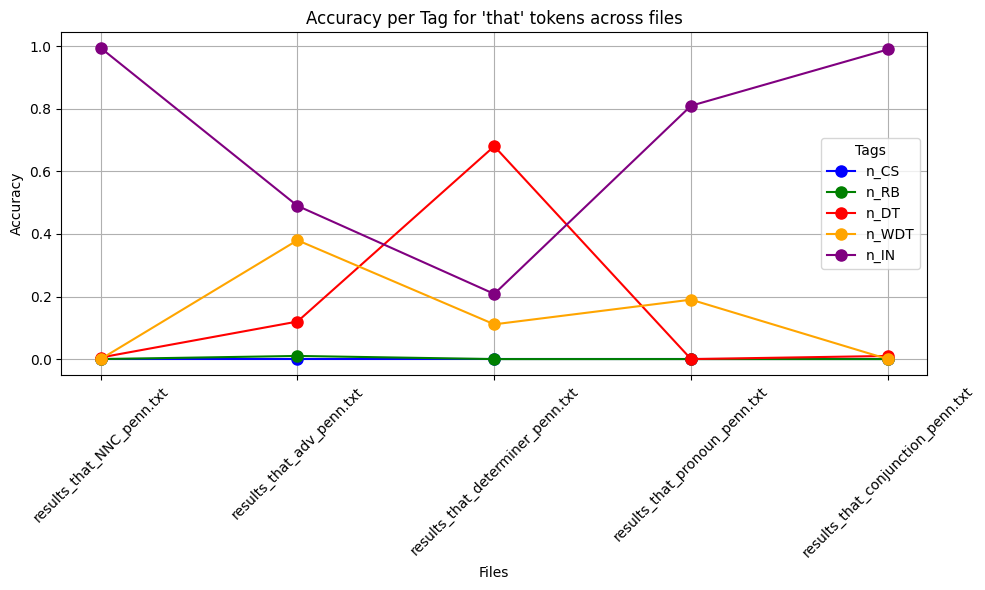

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Directory where the result files are stored
path = "tests_results/"  
n_results = {}

# List of result files generated by TreeTagger
files = [
    "results_that_NNC_penn.txt",
    "results_that_adv_penn.txt",
    "results_that_determiner_penn.txt",
    "results_that_pronoun_penn.txt",
    "results_that_conjunction_penn.txt"
]

# Mapping file names to corresponding 'that' tags
tags = ['n_CS', 'n_RB', 'n_DT', 'n_WDT', 'n_IN']

# Check if the results directory exists
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for file_name in files:
        file_path = os.path.join(path, file_name)
        
        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Count the occurrences of 'that' token in different categories
                tmp = {
                    'n_CS': content.count("that\tCS"),
                    'n_WPR': content.count("that\tWPR"),
                    'n_WDT': content.count("that\tWDT"),
                    'n_CST': content.count("that\tCST"),
                    'n_IN': content.count("that\tIN"),
                    'n_CJT': content.count("that\tCJT"),
                    'n_DT': content.count("that\tDT"),
                    'n_RB': content.count("that\tRB"), 
                    'n_VB': content.count("that\tVB"),
                    'n_MD': content.count("that\tMD")
                }
            # Store the results in the dictionary with the file name as the key
            n_results[file_name] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

# Print or process the results as needed
print(n_results)

# Now calculate the accuracy for each tag and for each file
accuracy_per_tag = {tag: [] for tag in tags}  # Initialize an empty list for each tag

for tag in tags:
    for file_name, data in n_results.items():
        # For each file, calculate accuracy for the given tag
        total_that = sum(data.values())  # Sum of all 'that' occurrences in the file
        
        if total_that > 0:
            accuracy = data[tag] / total_that  # Accuracy for the specific tag
        else:
            accuracy = 0  # If there are no "that" tokens in the file, accuracy is 0
        
        accuracy_per_tag[tag].append(accuracy)  # Store the accuracy for each tag

# Print out the accuracy for each tag
print(accuracy_per_tag)

# Plot the accuracy for each tag across files
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Colors for the tags

plt.figure(figsize=(10, 6))

# Loop through each tag and plot the corresponding accuracy values
for i, tag in enumerate(tags):
    plt.plot(files, accuracy_per_tag[tag], label=tag, marker='o', color=colors[i], linestyle='-', markersize=8)

# Add labels and title
plt.xlabel("Files")
plt.ylabel("Accuracy")
plt.title("Accuracy per Tag for 'that' tokens across files")
plt.legend(title="Tags")
plt.xticks(rotation=45)
plt.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig("accuracy_per_tag.png")
plt.show()


We will compute  now  la  precision et le recall pour  les differens fichiers de tests 

{'results_that_NNC_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 199, 'n_CJT': 0, 'n_DT': 1, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_adv_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 38, 'n_CST': 0, 'n_IN': 49, 'n_CJT': 0, 'n_DT': 12, 'n_RB': 1, 'n_VB': 0, 'n_MD': 0}, 'results_that_determiner_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 8, 'n_CST': 0, 'n_IN': 15, 'n_CJT': 0, 'n_DT': 49, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_pronoun_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 19, 'n_CST': 0, 'n_IN': 81, 'n_CJT': 0, 'n_DT': 0, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_conjunction_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 99, 'n_CJT': 0, 'n_DT': 1, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}}
Precision per tag: {'n_CS': [0.0, 0.0, 0.0, 0.0, 0.0], 'n_RB': [0.0, 0.01, 0.0, 0.0, 0.0], 'n_DT': [0.005, 0.12, 0.6805555555555556, 0.0, 0.01], 'n_WDT': [0.0, 0.38, 0.1111111111111111, 0.19, 0.0], 'n_IN': [0.995, 0.49, 0.20833333333333334, 0.81

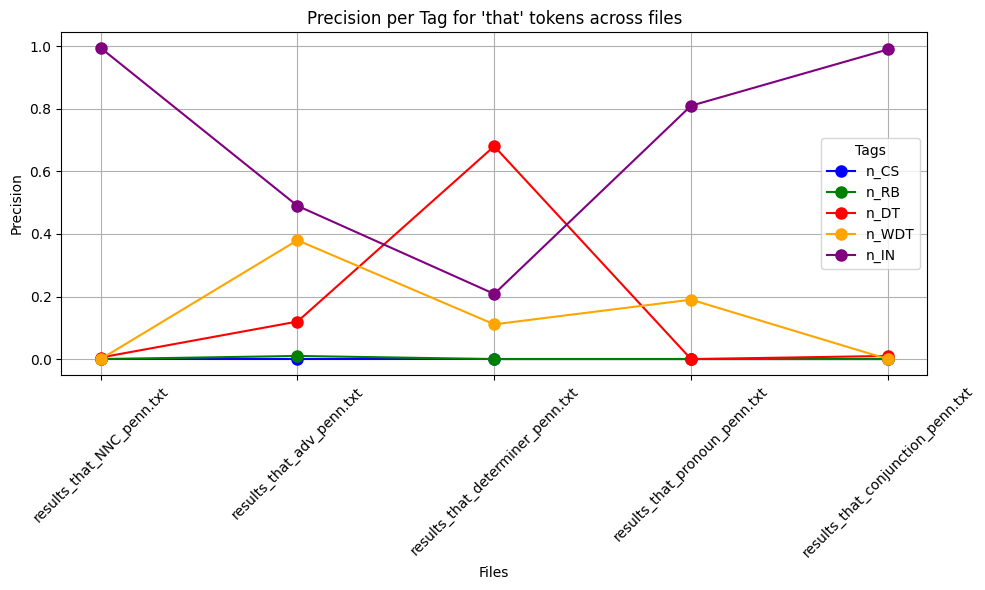

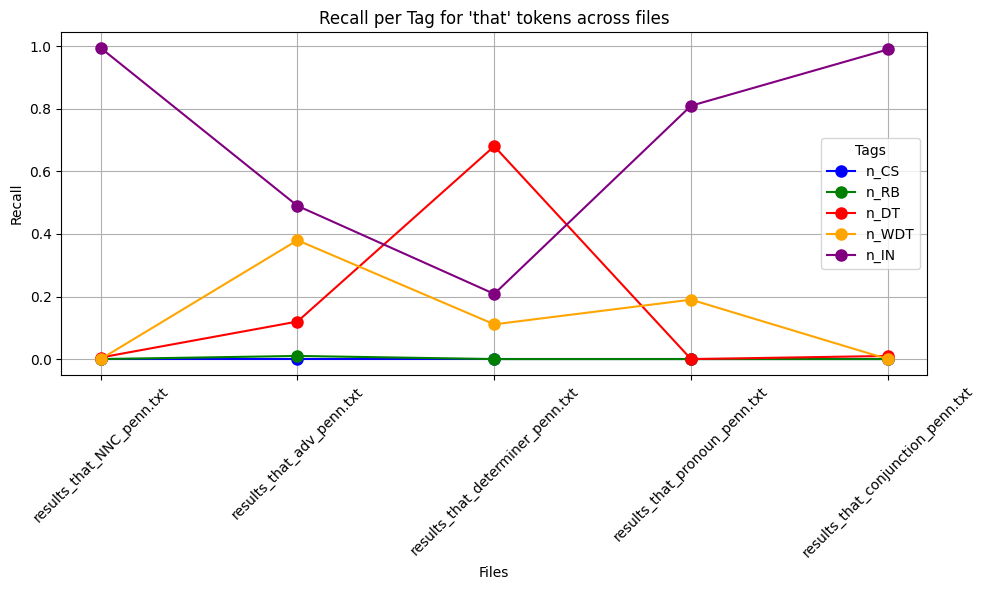

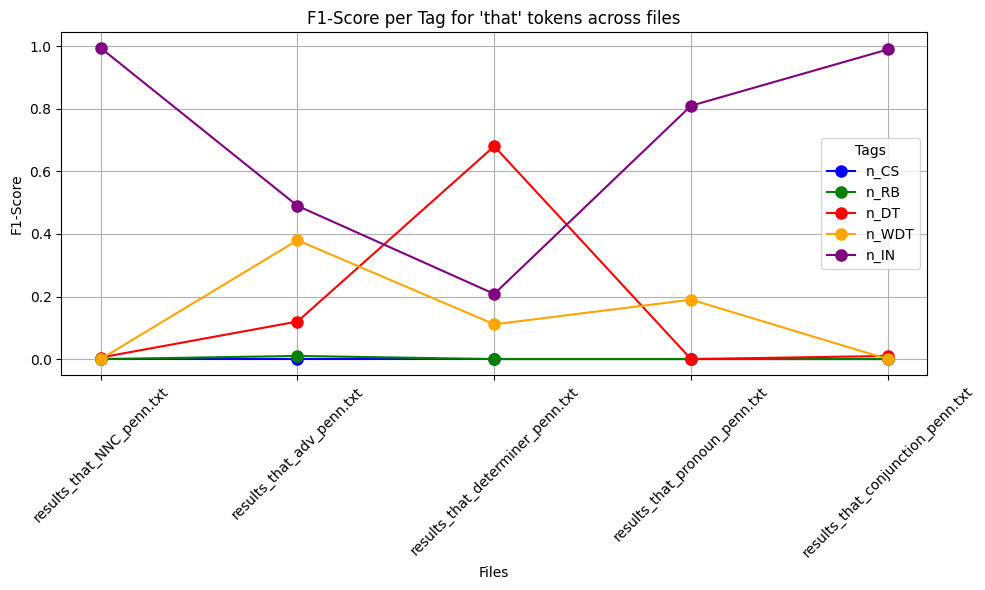

In [5]:
# Directory where the result files are stored
path = "tests_results/"  
n_results = {}

# List of result files generated by TreeTagger
files = [
    "results_that_NNC_penn.txt",
    "results_that_adv_penn.txt",
    "results_that_determiner_penn.txt",
    "results_that_pronoun_penn.txt",
    "results_that_conjunction_penn.txt"
]

# Mapping file names to corresponding 'that' tags
tags = ['n_CS', 'n_RB', 'n_DT', 'n_WDT', 'n_IN']

# Check if the results directory exists
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for file_name in files:
        file_path = os.path.join(path, file_name)
        
        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Count the occurrences of 'that' token in different categories
                tmp = {
                    'n_CS': content.count("that\tCS"),
                    'n_WPR': content.count("that\tWPR"),
                    'n_WDT': content.count("that\tWDT"),
                    'n_CST': content.count("that\tCST"),
                    'n_IN': content.count("that\tIN"),
                    'n_CJT': content.count("that\tCJT"),
                    'n_DT': content.count("that\tDT"),
                    'n_RB': content.count("that\tRB"), 
                    'n_VB': content.count("that\tVB"),
                    'n_MD': content.count("that\tMD")
                }
            # Store the results in the dictionary with the file name as the key
            n_results[file_name] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

# Print or process the results as needed
print(n_results)

# Initialize dictionaries for precision, recall, and F1-Score
precision_per_tag = {tag: [] for tag in tags}
recall_per_tag = {tag: [] for tag in tags}
f1_score_per_tag = {tag: [] for tag in tags}

for tag in tags:
    for file_name, data in n_results.items():
        # Calculate true positives, false positives, and false negatives
        true_positive = data[tag]
        false_positive = sum(data.values()) - true_positive
        false_negative = max(sum(data.values()) - true_positive, 0)

        # Calculate precision, recall, and F1-Score
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Append metrics for this file
        precision_per_tag[tag].append(precision)
        recall_per_tag[tag].append(recall)
        f1_score_per_tag[tag].append(f1_score)

# Print out the metrics
print("Precision per tag:", precision_per_tag)
print("Recall per tag:", recall_per_tag)
print("F1-Score per tag:", f1_score_per_tag)

# Plotting precision, recall, and F1-Score for each tag
metrics = {'Precision': precision_per_tag, 'Recall': recall_per_tag, 'F1-Score': f1_score_per_tag}
colors = ['blue', 'green', 'red', 'orange', 'purple']

for metric_name, metric_data in metrics.items():
    plt.figure(figsize=(10, 6))
    for i, tag in enumerate(tags):
        plt.plot(files, metric_data[tag], label=tag, marker='o', color=colors[i], linestyle='-', markersize=8)

    plt.xlabel("Files")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} per Tag for 'that' tokens across files")
    plt.legend(title="Tags")
    plt.xticks(rotation=45)
    plt.grid(True)

    # Save and show the plot
    plt.tight_layout()
    plt.savefig(f"{metric_name.lower()}_per_tag.png")
    plt.show()


***Now we will  compute the conusion matrix*** 

{'results_that_NNC_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 199, 'n_CJT': 0, 'n_DT': 1, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_adv_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 38, 'n_CST': 0, 'n_IN': 49, 'n_CJT': 0, 'n_DT': 12, 'n_RB': 1, 'n_VB': 0, 'n_MD': 0}, 'results_that_determiner_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 8, 'n_CST': 0, 'n_IN': 15, 'n_CJT': 0, 'n_DT': 49, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_pronoun_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 19, 'n_CST': 0, 'n_IN': 81, 'n_CJT': 0, 'n_DT': 0, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_conjunction_penn.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 99, 'n_CJT': 0, 'n_DT': 1, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}}


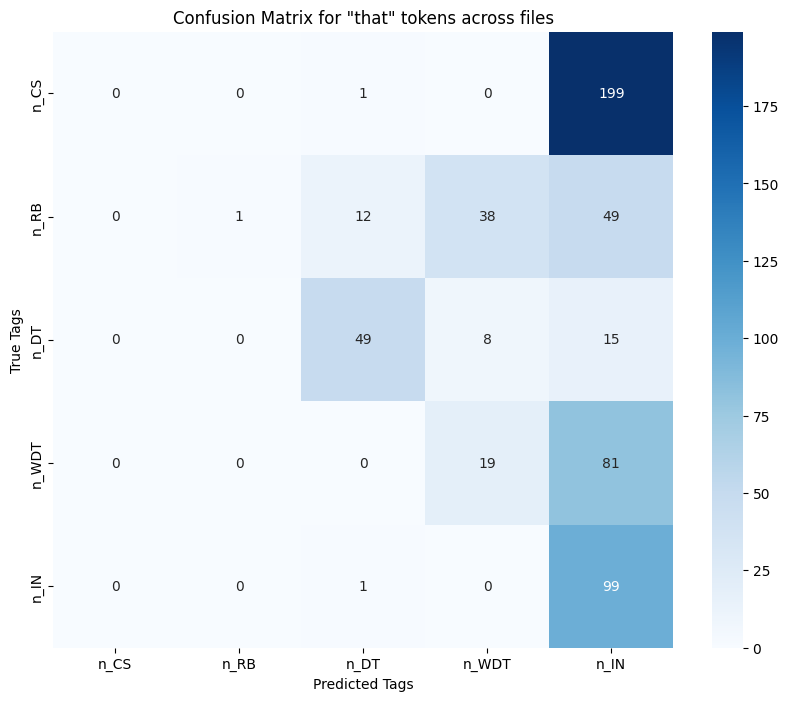

In [6]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Directory where the result files are stored
path = "tests_results/"  
n_results = {}

# List of result files generated by TreeTagger
files = [
    "results_that_NNC_penn.txt",
    "results_that_adv_penn.txt",
    "results_that_determiner_penn.txt",
    "results_that_pronoun_penn.txt",
    "results_that_conjunction_penn.txt"
]

# Mapping file names to corresponding 'that' tags
true_tags = ['n_CS', 'n_RB', 'n_DT', 'n_WDT', 'n_IN']

# Check if the results directory exists
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for file_name in files:
        file_path = os.path.join(path, file_name)
        
        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Count the occurrences of 'that' token in different categories
                tmp = {
                    'n_CS': content.count("that\tCS"),
                    'n_WPR': content.count("that\tWPR"),
                    'n_WDT': content.count("that\tWDT"),
                    'n_CST': content.count("that\tCST"),
                    'n_IN': content.count("that\tIN"),
                    'n_CJT': content.count("that\tCJT"),
                    'n_DT': content.count("that\tDT"),
                    'n_RB': content.count("that\tRB"), 
                    'n_VB': content.count("that\tVB"),
                    'n_MD': content.count("that\tMD")
                }
            # Store the results in the dictionary with the file name as the key
            n_results[file_name] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

# Print or process the results as needed
print(n_results)

# Initialize lists to store true and predicted tags for confusion matrix calculation
true_labels = []
predicted_labels = []

# Iterate over each file and calculate true and predicted tags
for i, file_name in enumerate(files):
    true_tag = true_tags[i]
    data = n_results[file_name]
    
    for tag, count in data.items():
        true_labels.extend([true_tag] * count)
        predicted_labels.extend([tag] * count)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=true_tags)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=true_tags, yticklabels=true_tags)
plt.xlabel('Predicted Tags')
plt.ylabel('True Tags')
plt.title('Confusion Matrix for "that" tokens across files')
plt.show()

Nous allons Comparer ici  les modèles Penn et BNC,  pour cela  nous allons  juste remplacer  penn.par par bnc.par  dans les etapes passés 

***test du  model bnc par  les fichiers de test***

In [7]:
!tree-tagger -token bnc.par testing_sets/NNC_tokenized.txt tests_results/results_that_NNC_bnc.txt
!tree-tagger -token bnc.par testing_sets/that_adv_tokenized.txt tests_results/results_that_adv_bnc.txt
!tree-tagger -token bnc.par testing_sets/that_determiner_tokenized.txt tests_results/results_that_determiner_bnc.txt
!tree-tagger -token bnc.par testing_sets/that_pronoun_tokenized.txt tests_results/results_that_pronoun_bnc.txt
!tree-tagger -token bnc.par testing_sets/that_conjunction_tokenized.txt tests_results/results_that_conjunction_bnc.txt


	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.


{'results_that_NNC_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 198, 'n_DT': 2, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_adv_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 65, 'n_DT': 35, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_determiner_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 15, 'n_DT': 57, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_pronoun_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 97, 'n_DT': 3, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_conjunction_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 96, 'n_DT': 4, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}}
{'n_CS': [0.0, 0.0, 0.0, 0.0, 0.0], 'n_RB': [0.0, 0.0, 0.0, 0.0, 0.0], 'n_DT': [0.01, 0.35, 0.7916666666666666, 0.03, 0.04], 'n_WDT': [0.0, 0.0, 0.0, 0.0, 0.0], 'n_IN': [0.0, 0.0, 0.0, 0.0, 0.0]}


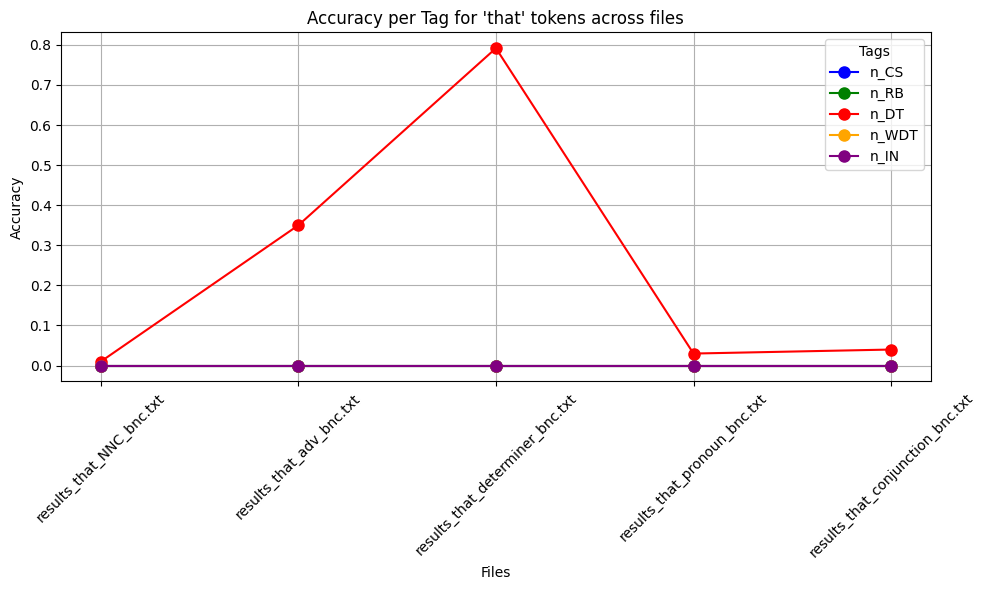

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Directory where the result files are stored
path = "tests_results/"  
n_results = {}

# List of result files generated by TreeTagger
files = [
    "results_that_NNC_bnc.txt",
    "results_that_adv_bnc.txt",
    "results_that_determiner_bnc.txt",
    "results_that_pronoun_bnc.txt",
    "results_that_conjunction_bnc.txt"
]

# Mapping file names to corresponding 'that' tags
tags = ['n_CS', 'n_RB', 'n_DT', 'n_WDT', 'n_IN']

# Check if the results directory exists
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for file_name in files:
        file_path = os.path.join(path, file_name)
        
        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Count the occurrences of 'that' token in different categories
                tmp = {
                    'n_CS': content.count("that\tCS"),
                    'n_WPR': content.count("that\tWPR"),
                    'n_WDT': content.count("that\tWDT"),
                    'n_CST': content.count("that\tCST"),
                    'n_IN': content.count("that\tIN"),
                    'n_CJT': content.count("that\tCJT"),
                    'n_DT': content.count("that\tDT"),
                    'n_RB': content.count("that\tRB"), 
                    'n_VB': content.count("that\tVB"),
                    'n_MD': content.count("that\tMD")
                }
            # Store the results in the dictionary with the file name as the key
            n_results[file_name] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

# Print or process the results as needed
print(n_results)

# Now calculate the accuracy for each tag and for each file
accuracy_per_tag = {tag: [] for tag in tags}  # Initialize an empty list for each tag

for tag in tags:
    for file_name, data in n_results.items():
        # For each file, calculate accuracy for the given tag
        total_that = sum(data.values())  # Sum of all 'that' occurrences in the file
        
        if total_that > 0:
            accuracy = data[tag] / total_that  # Accuracy for the specific tag
        else:
            accuracy = 0  # If there are no "that" tokens in the file, accuracy is 0
        
        accuracy_per_tag[tag].append(accuracy)  # Store the accuracy for each tag

# Print out the accuracy for each tag
print(accuracy_per_tag)

# Plot the accuracy for each tag across files
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Colors for the tags

plt.figure(figsize=(10, 6))

# Loop through each tag and plot the corresponding accuracy values
for i, tag in enumerate(tags):
    plt.plot(files, accuracy_per_tag[tag], label=tag, marker='o', color=colors[i], linestyle='-', markersize=8)

# Add labels and title
plt.xlabel("Files")
plt.ylabel("Accuracy")
plt.title("Accuracy per Tag for 'that' tokens across files")
plt.legend(title="Tags")
plt.xticks(rotation=45)
plt.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig("accuracy_per_tag.png")
plt.show()


{'results_that_NNC_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 198, 'n_DT': 2, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_adv_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 65, 'n_DT': 35, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_determiner_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 15, 'n_DT': 57, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_pronoun_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 97, 'n_DT': 3, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_conjunction_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 96, 'n_DT': 4, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}}
Precision per tag: {'n_CS': [0.0, 0.0, 0.0, 0.0, 0.0], 'n_RB': [0.0, 0.0, 0.0, 0.0, 0.0], 'n_DT': [0.01, 0.35, 0.7916666666666666, 0.03, 0.04], 'n_WDT': [0.0, 0.0, 0.0, 0.0, 0.0], 'n_IN': [0.0, 0.0, 0.0, 0.0, 0.0]}
Recall per tag: {'n_CS': [0.0, 0.0, 0

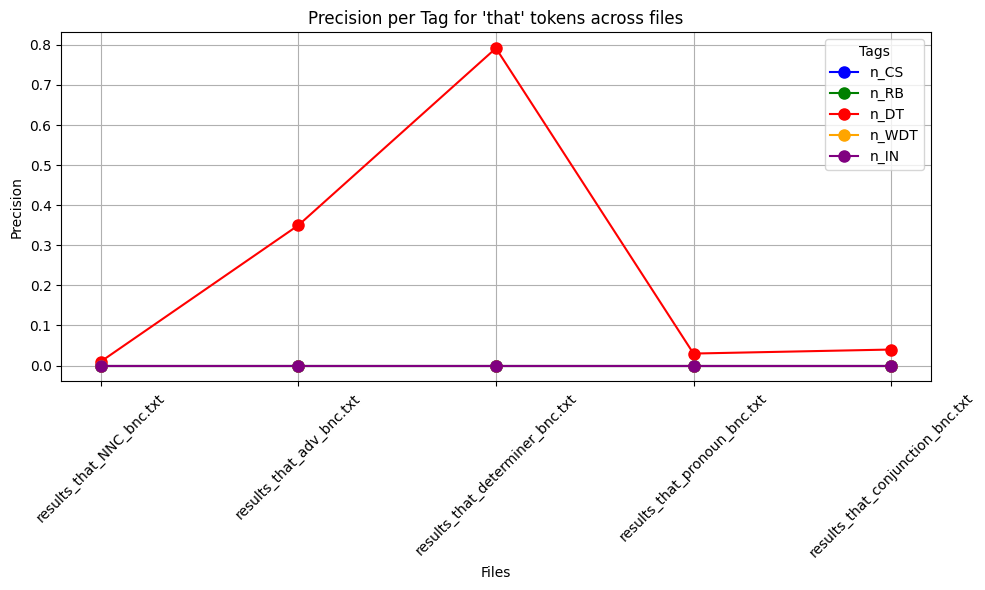

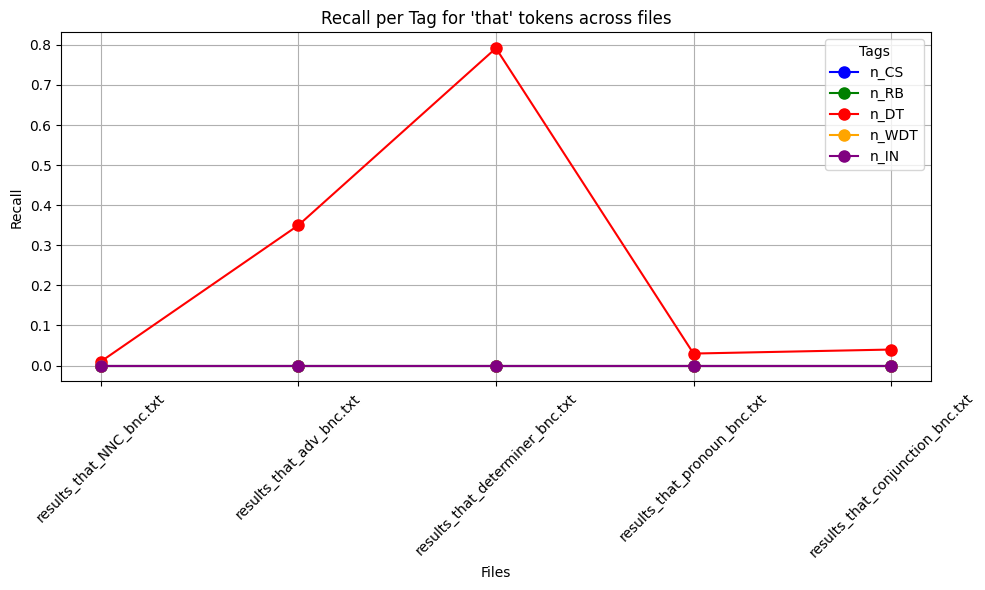

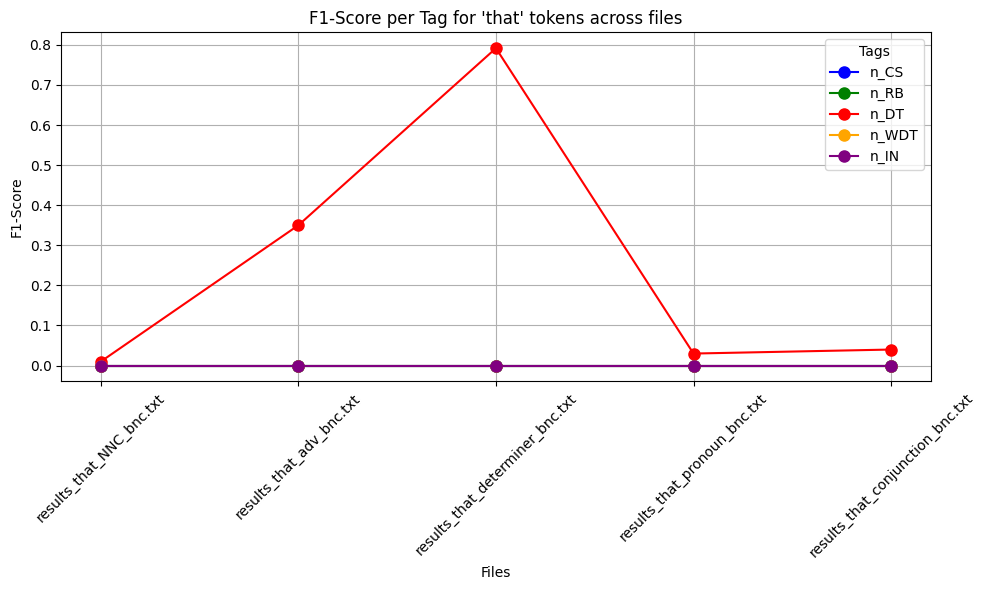

In [12]:
# Directory where the result files are stored
path = "tests_results/"  
n_results = {}

# List of result files generated by TreeTagger
files = [
    "results_that_NNC_bnc.txt",
    "results_that_adv_bnc.txt",
    "results_that_determiner_bnc.txt",
    "results_that_pronoun_bnc.txt",
    "results_that_conjunction_bnc.txt"
]

# Mapping file names to corresponding 'that' tags
tags = ['n_CS', 'n_RB', 'n_DT', 'n_WDT', 'n_IN']

# Check if the results directory exists
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for file_name in files:
        file_path = os.path.join(path, file_name)
        
        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Count the occurrences of 'that' token in different categories
                tmp = {
                    'n_CS': content.count("that\tCS"),
                    'n_WPR': content.count("that\tWPR"),
                    'n_WDT': content.count("that\tWDT"),
                    'n_CST': content.count("that\tCST"),
                    'n_IN': content.count("that\tIN"),
                    'n_CJT': content.count("that\tCJT"),
                    'n_DT': content.count("that\tDT"),
                    'n_RB': content.count("that\tRB"), 
                    'n_VB': content.count("that\tVB"),
                    'n_MD': content.count("that\tMD")
                }
            # Store the results in the dictionary with the file name as the key
            n_results[file_name] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

# Print or process the results as needed
print(n_results)

# Initialize dictionaries for precision, recall, and F1-Score
precision_per_tag = {tag: [] for tag in tags}
recall_per_tag = {tag: [] for tag in tags}
f1_score_per_tag = {tag: [] for tag in tags}

for tag in tags:
    for file_name, data in n_results.items():
        # Calculate true positives, false positives, and false negatives
        true_positive = data[tag]
        false_positive = sum(data.values()) - true_positive
        false_negative = max(sum(data.values()) - true_positive, 0)

        # Calculate precision, recall, and F1-Score
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Append metrics for this file
        precision_per_tag[tag].append(precision)
        recall_per_tag[tag].append(recall)
        f1_score_per_tag[tag].append(f1_score)

# Print out the metrics
print("Precision per tag:", precision_per_tag)
print("Recall per tag:", recall_per_tag)
print("F1-Score per tag:", f1_score_per_tag)

# Plotting precision, recall, and F1-Score for each tag
metrics = {'Precision': precision_per_tag, 'Recall': recall_per_tag, 'F1-Score': f1_score_per_tag}
colors = ['blue', 'green', 'red', 'orange', 'purple']

for metric_name, metric_data in metrics.items():
    plt.figure(figsize=(10, 6))
    for i, tag in enumerate(tags):
        plt.plot(files, metric_data[tag], label=tag, marker='o', color=colors[i], linestyle='-', markersize=8)

    plt.xlabel("Files")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} per Tag for 'that' tokens across files")
    plt.legend(title="Tags")
    plt.xticks(rotation=45)
    plt.grid(True)

    # Save and show the plot
    plt.tight_layout()
    plt.savefig(f"{metric_name.lower()}_per_tag.png")
    plt.show()


{'results_that_NNC_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 198, 'n_DT': 2, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_adv_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 65, 'n_DT': 35, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_determiner_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 15, 'n_DT': 57, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_pronoun_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 97, 'n_DT': 3, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, 'results_that_conjunction_bnc.txt': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 0, 'n_CST': 0, 'n_IN': 0, 'n_CJT': 96, 'n_DT': 4, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}}


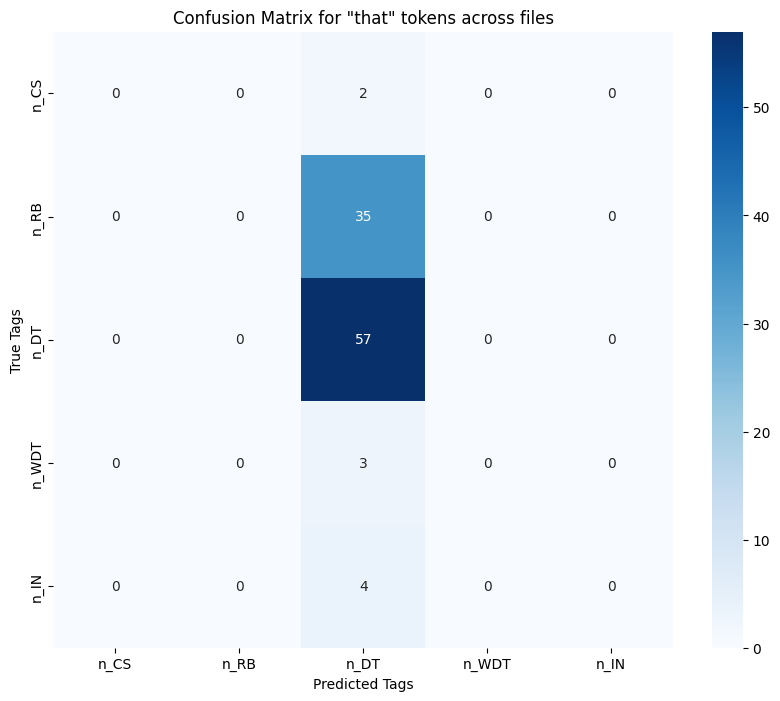

In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Directory where the result files are stored
path = "tests_results/"  
n_results = {}

# List of result files generated by TreeTagger
files = [
    "results_that_NNC_bnc.txt",
    "results_that_adv_bnc.txt",
    "results_that_determiner_bnc.txt",
    "results_that_pronoun_bnc.txt",
    "results_that_conjunction_bnc.txt"
]

# Mapping file names to corresponding 'that' tags
true_tags = ['n_CS', 'n_RB', 'n_DT', 'n_WDT', 'n_IN']

# Check if the results directory exists
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for file_name in files:
        file_path = os.path.join(path, file_name)
        
        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Count the occurrences of 'that' token in different categories
                tmp = {
                    'n_CS': content.count("that\tCS"),
                    'n_WPR': content.count("that\tWPR"),
                    'n_WDT': content.count("that\tWDT"),
                    'n_CST': content.count("that\tCST"),
                    'n_IN': content.count("that\tIN"),
                    'n_CJT': content.count("that\tCJT"),
                    'n_DT': content.count("that\tDT"),
                    'n_RB': content.count("that\tRB"), 
                    'n_VB': content.count("that\tVB"),
                    'n_MD': content.count("that\tMD")
                }
            # Store the results in the dictionary with the file name as the key
            n_results[file_name] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

# Print or process the results as needed
print(n_results)

# Initialize lists to store true and predicted tags for confusion matrix calculation
true_labels = []
predicted_labels = []

# Iterate over each file and calculate true and predicted tags
for i, file_name in enumerate(files):
    true_tag = true_tags[i]
    data = n_results[file_name]
    
    for tag, count in data.items():
        true_labels.extend([true_tag] * count)
        predicted_labels.extend([tag] * count)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=true_tags)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=true_tags, yticklabels=true_tags)
plt.xlabel('Predicted Tags')
plt.ylabel('True Tags')
plt.title('Confusion Matrix for "that" tokens across files for  bnc model')
plt.show()

### Maintenant  nous allons donner le tableau de comparaison des données 

                               Files  Precision_n_CS  Precision_n_RB  \
0           results_that_NNC_bnc.txt             0.0            0.00   
1           results_that_adv_bnc.txt             0.0            0.00   
2    results_that_determiner_bnc.txt             0.0            0.00   
3       results_that_pronoun_bnc.txt             0.0            0.00   
4   results_that_conjunction_bnc.txt             0.0            0.00   
5          results_that_NNC_penn.txt             0.0            0.00   
6          results_that_adv_penn.txt             0.0            0.01   
7   results_that_determiner_penn.txt             0.0            0.00   
8      results_that_pronoun_penn.txt             0.0            0.00   
9  results_that_conjunction_penn.txt             0.0            0.00   

   Precision_n_DT  Precision_n_WDT  Precision_n_IN  Recall_n_CS  Recall_n_RB  \
0        1.000000         0.000000        0.000000          0.0         0.00   
1        1.000000         0.000000        0.000

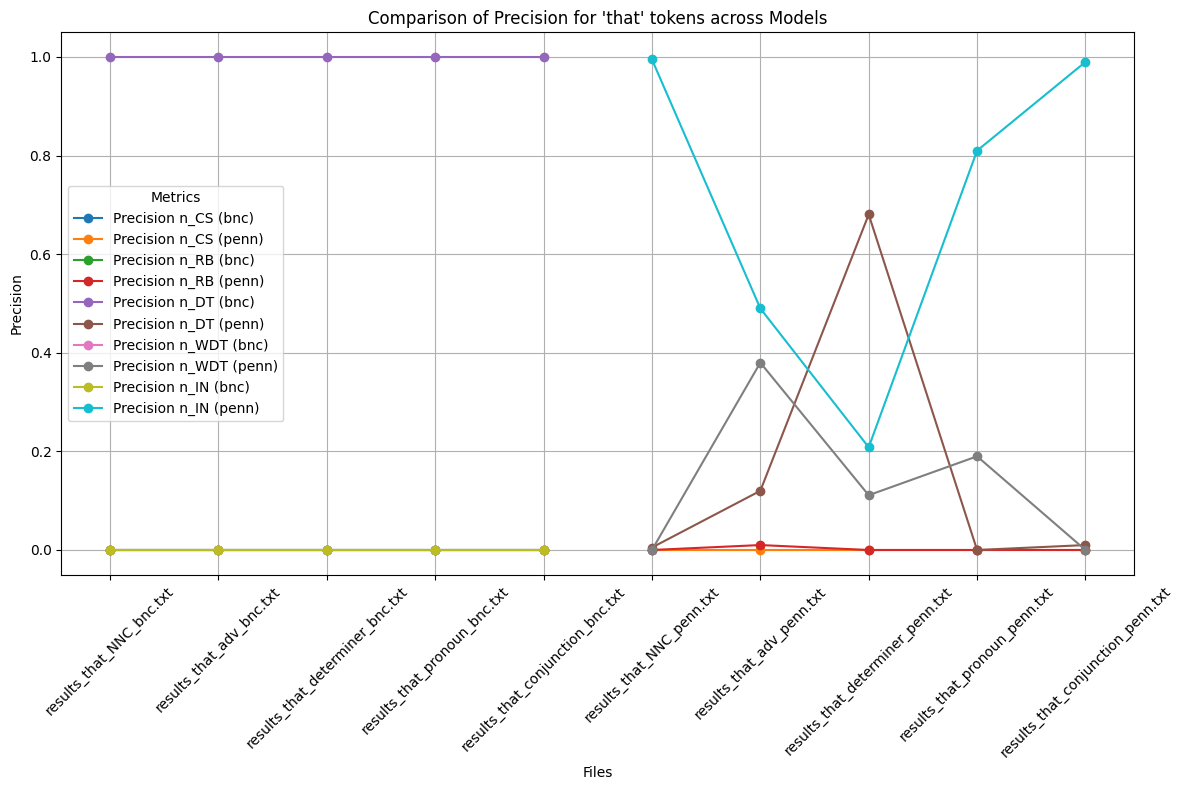

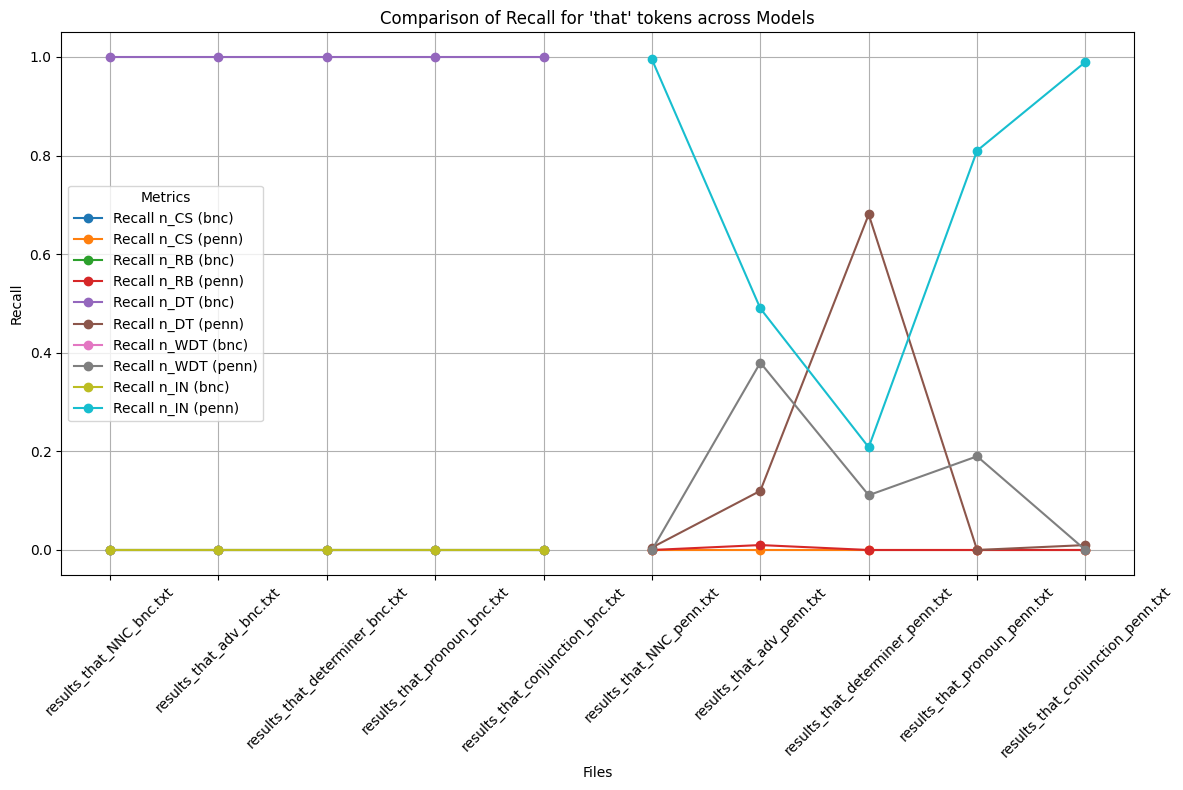

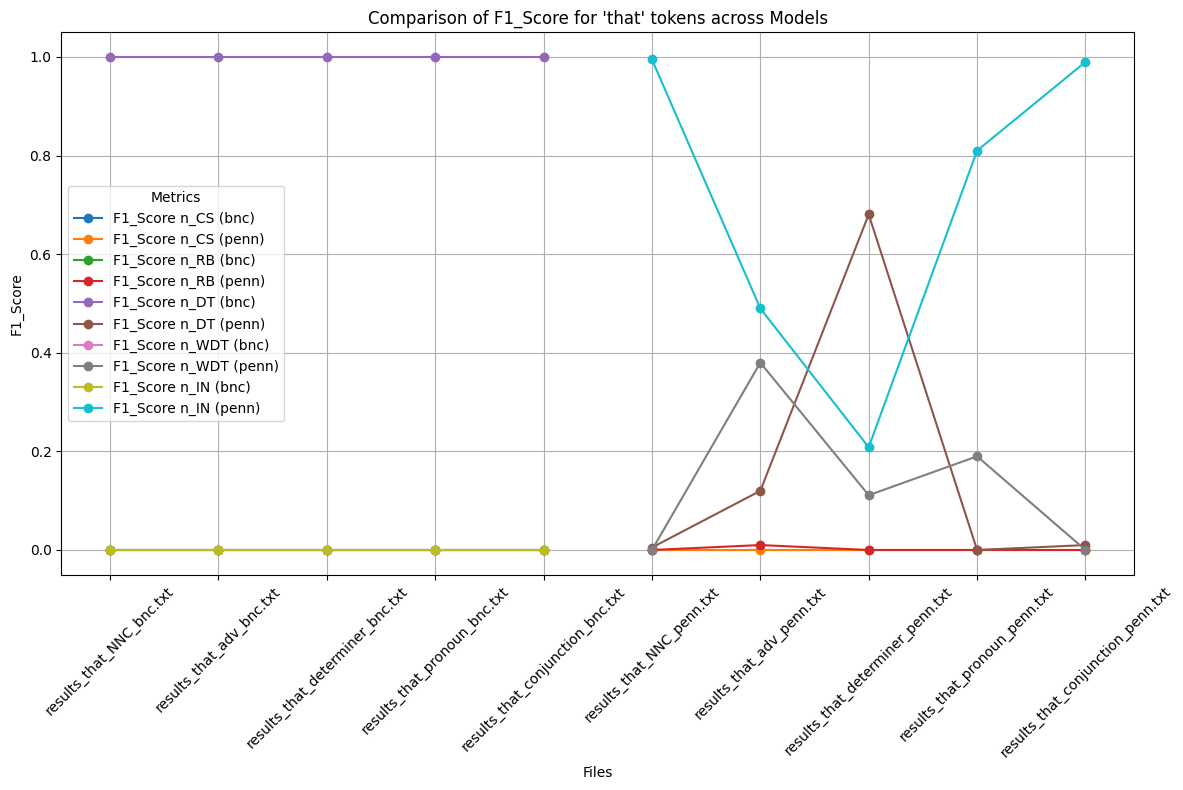

In [15]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Fonction pour calculer les métriques (précision, rappel, F1-Score)
def calculate_metrics(n_results, tags):
    precision_per_tag = {tag: [] for tag in tags}
    recall_per_tag = {tag: [] for tag in tags}
    f1_score_per_tag = {tag: [] for tag in tags}

    for tag in tags:
        for file_name, data in n_results.items():
            true_positive = data[tag]
            false_positive = sum(data.values()) - true_positive
            false_negative = max(sum(data.values()) - true_positive, 0)

            # Calcul des métriques
            precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
            recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
            f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

            # Stockage des métriques
            precision_per_tag[tag].append(precision)
            recall_per_tag[tag].append(recall)
            f1_score_per_tag[tag].append(f1_score)
    
    return precision_per_tag, recall_per_tag, f1_score_per_tag

# Fonction pour lire les fichiers et compter les occurrences
def process_results(path, files, tags):
    n_results = {}
    if not os.path.exists(path):
        print(f"Directory '{path}' does not exist!")
        return n_results
    
    for file_name in files:
        file_path = os.path.join(path, file_name)
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                n_results[file_name] = {tag: content.count(f"that\t{tag.split('_')[1]}") for tag in tags}
        else:
            print(f"File '{file_path}' not found. Skipping...")
    return n_results

# Modèles à analyser
models = {
    "bnc": {
        "path": "tests_results/",
        "files": [
            "results_that_NNC_bnc.txt",
            "results_that_adv_bnc.txt",
            "results_that_determiner_bnc.txt",
            "results_that_pronoun_bnc.txt",
            "results_that_conjunction_bnc.txt"
        ]
    },
    "penn": {
        "path": "tests_results/",
        "files": [
            "results_that_NNC_penn.txt",
            "results_that_adv_penn.txt",
            "results_that_determiner_penn.txt",
            "results_that_pronoun_penn.txt",
            "results_that_conjunction_penn.txt"
        ]
    }
}

tags = ['n_CS', 'n_RB', 'n_DT', 'n_WDT', 'n_IN']
metrics_summary = []

# Analyse des modèles
for model_name, model_data in models.items():
    n_results = process_results(model_data["path"], model_data["files"], tags)
    precision, recall, f1_score = calculate_metrics(n_results, tags)
    
    # Sauvegarde des résultats dans un DataFrame
    metrics_df = pd.DataFrame({
        "Files": model_data["files"],
        **{f"Precision_{tag}": values for tag, values in precision.items()},
        **{f"Recall_{tag}": values for tag, values in recall.items()},
        **{f"F1_Score_{tag}": values for tag, values in f1_score.items()},
    })
    metrics_df["Model"] = model_name
    metrics_summary.append(metrics_df)

# Combinaison des résultats et sauvegarde
final_results = pd.concat(metrics_summary, ignore_index=True)
final_results.to_csv("comparison_metrics.csv", index=False)

# Affichage des résultats en tableau
print(final_results)

# Visualisation
for metric_type in ["Precision", "Recall", "F1_Score"]:
    plt.figure(figsize=(12, 8))
    for tag in tags:
        for model_name in models.keys():
            subset = final_results[final_results["Model"] == model_name]
            plt.plot(subset["Files"], subset[f"{metric_type}_{tag}"], label=f"{metric_type} {tag} ({model_name})", marker='o')

    plt.xlabel("Files")
    plt.ylabel(metric_type)
    plt.title(f"Comparison of {metric_type} for 'that' tokens across Models")
    plt.legend(title="Metrics")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{metric_type.lower()}_comparison.png")
    plt.show()


## 2. Retrain TreeTagger

### Objective:
Retrain *TreeTagger* with a specific tagset to distinguish the various uses of the word *that* in English.

#### Steps:

1. **Select a Tagset**
   - Use the **C8** tagset (adapted from CLAWS8) for more precise annotation of *that*. The tagset includes categories such as:
     - `WPR`: Relative Pronoun (e.g., *The man that I saw*),
     - `CST`: Subordinating Conjunction (e.g., *The fact that*),
     - `CJT`: Conjunction for verbs (e.g., *I think that*),
     - `DT`: Singular Determiner (e.g., *that* in *that man*),
     - `RB`: Adverb (e.g., *It's not that difficult*).

2. **Retrain TreeTagger with New Tags**
   - Adapt the training model using sentences annotated with the C8 tagset.
   - To retrain *TreeTagger*, use the following command:
     ```bash
     ./tree-tagger train model.txt
     ```

3. **Measure Precision and Recall**
   - Evaluate the precision and recall of the retrained model by testing it on specific datasets.

#### C8 Tagset:
- Refer to this document for more details about the C8 tagset: [C8 Tagset](https://ucrel.lancs.ac.uk/claws8tags.pdf).

### Expected Output:
- Precision and recall report for each use of the word *that* in test datasets.


***First we  acquit the brown data in the files on single folder***

In [18]:
# Step 1: Download the Brown Corpus
nltk.download('brown')
# Extract sentences as lists of words
sentences = brown.sents()
# Step 2: Define the output folder
output_folder = "raw_brown_data"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Step 3: Save Brown Corpus files as individual .txt files
for i, file_id in enumerate(brown.fileids()):
    # Get the raw text for each file
    file_text = " ".join(brown.words(file_id))
    
    # Define the output file name
    output_file = os.path.join(output_folder, f"{file_id}.txt")
    
    # Write the text to a .txt file
    with open(output_file, "w", encoding="utf-8") as f:
        f.write(file_text)
    
    print(f"Saved {file_id} -> {output_file}")


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\MLSD\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


Saved ca01 -> raw_brown_data\ca01.txt
Saved ca02 -> raw_brown_data\ca02.txt
Saved ca03 -> raw_brown_data\ca03.txt
Saved ca04 -> raw_brown_data\ca04.txt
Saved ca05 -> raw_brown_data\ca05.txt
Saved ca06 -> raw_brown_data\ca06.txt
Saved ca07 -> raw_brown_data\ca07.txt
Saved ca08 -> raw_brown_data\ca08.txt
Saved ca09 -> raw_brown_data\ca09.txt
Saved ca10 -> raw_brown_data\ca10.txt
Saved ca11 -> raw_brown_data\ca11.txt
Saved ca12 -> raw_brown_data\ca12.txt
Saved ca13 -> raw_brown_data\ca13.txt
Saved ca14 -> raw_brown_data\ca14.txt
Saved ca15 -> raw_brown_data\ca15.txt
Saved ca16 -> raw_brown_data\ca16.txt
Saved ca17 -> raw_brown_data\ca17.txt
Saved ca18 -> raw_brown_data\ca18.txt
Saved ca19 -> raw_brown_data\ca19.txt
Saved ca20 -> raw_brown_data\ca20.txt
Saved ca21 -> raw_brown_data\ca21.txt
Saved ca22 -> raw_brown_data\ca22.txt
Saved ca23 -> raw_brown_data\ca23.txt
Saved ca24 -> raw_brown_data\ca24.txt
Saved ca25 -> raw_brown_data\ca25.txt
Saved ca26 -> raw_brown_data\ca26.txt
Saved ca27 -

***Here below, we annote the brown collected files***

In [19]:
import os
import requests

def annotate_text_with_udpipe(text, model="english-ewt"):
    """
    Annotate text using UDPipe REST API.
    Args:
        text (str): Text to annotate.
        model (str): Model to use (default is 'english-ewt').
    Returns:
        str: Annotated text in CoNLL-U format.
    """
    url = "https://lindat.mff.cuni.cz/services/udpipe/api/process"
    payload = {
        "data": text,
        "model": model,
        "tokenizer": "yes",
        "tagger": "yes",
        "parser": "yes"
    }
    response = requests.post(url, data=payload)
    if response.status_code == 200:
        return response.json()["result"]
    else:
        raise Exception(f"UDPipe API Error: {response.status_code}, {response.text}")

def annotate_corpus(input_folder, output_folder, model="english-ewt"):
    """
    Annotate all text files in a folder and save as CoNLL-U files.
    Args:
        input_folder (str): Path to folder containing text files.
        output_folder (str): Path to save annotated CoNLL-U files.
        model (str): UDPipe model to use (default is 'english-ewt').
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        file_path = os.path.join(input_folder, filename)
        if not os.path.isfile(file_path) or not filename.endswith(".txt"):
            continue
        
        # Read input text file
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()

        # Annotate using UDPipe
        try:
            annotated_text = annotate_text_with_udpipe(text, model)
        except Exception as e:
            print(f"Failed to process {filename}: {e}")
            continue

        # Save annotated text as CoNLL-U file
        output_file_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.conllu")
        with open(output_file_path, "w", encoding="utf-8") as output_file:
            output_file.write(annotated_text)
        print(f"Annotated {filename} -> {output_file_path}")

# Example usage:
input_folder = "raw_brown_data"  # Folder containing text files
output_folder = "brown_annotated"  # Folder to save CoNLL-U files
annotate_corpus(input_folder, output_folder)


Annotated ca01.txt -> brown_annotated\ca01.conllu
Annotated ca02.txt -> brown_annotated\ca02.conllu
Annotated ca03.txt -> brown_annotated\ca03.conllu
Annotated ca04.txt -> brown_annotated\ca04.conllu
Annotated ca05.txt -> brown_annotated\ca05.conllu
Annotated ca06.txt -> brown_annotated\ca06.conllu
Annotated ca07.txt -> brown_annotated\ca07.conllu
Annotated ca08.txt -> brown_annotated\ca08.conllu
Annotated ca09.txt -> brown_annotated\ca09.conllu
Annotated ca10.txt -> brown_annotated\ca10.conllu
Annotated ca11.txt -> brown_annotated\ca11.conllu
Annotated ca12.txt -> brown_annotated\ca12.conllu
Annotated ca13.txt -> brown_annotated\ca13.conllu
Annotated ca14.txt -> brown_annotated\ca14.conllu
Annotated ca15.txt -> brown_annotated\ca15.conllu
Annotated ca16.txt -> brown_annotated\ca16.conllu
Annotated ca17.txt -> brown_annotated\ca17.conllu
Annotated ca18.txt -> brown_annotated\ca18.conllu
Annotated ca19.txt -> brown_annotated\ca19.conllu
Annotated ca20.txt -> brown_annotated\ca20.conllu


### Creation of the training files  (`<file input>`):

In [20]:
def pprint(sentence):
    """
    This function prints the sentences if it contains "that" with
    the annotation of the "that" term.
    """
    sent_print = ""
    for j in range(len(sentence)):
        sent_print += sentence[j]['form']
        
        if(sentence[j]['form'].lower() == 'that'):
            sent_print += "/"
            sent_print += sentence[j]['xpos']
        sent_print += " "
        
    return sent_print

In [27]:
def countnonoverlappingrematches(pattern, thestring):
    return re.subn(pattern, '', thestring)[1]

In [34]:
import os
import conllu

def deps_emulator(folder_name="brown_annotated/"):
    """
    Input: a path to a folder containing all the conllu annotated files by the UDPipe.
    Output:
        - Creates a TOKEN_PER_ROW folder containing all the reannotated files in the TreeTagger specific input format.
        - A dictionary containing two lists:
            * The first one contains the IDs of the sentences in which there is a "that" re-annotated with WPR.
            * The second one contains the IDs of the sentences in which there is a "that" re-annotated with CST.
    """

    # Create the TOKEN_PER_ROW folder if it doesn't exist
    output_folder = os.path.join(folder_name, "TOKEN_PER_ROW")
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Initialize counters and data structures
    nb_acl = 0
    nb_aclrelcl = 0
    nb_that = 0
    nb_that_reannotated = 0
    nb_that_WPR = 0
    nb_that_CST = 0
    nb_vb_relcl_without_that = 0
    nb_tokens = 0
    nb_aclrelcl_vb = 0
    nb_acl_vb = 0

    sentences_reannotated_WPR = []  # IDs of sentences with "that" re-annotated as WPR
    sentences_reannotated_CST = []  # IDs of sentences with "that" re-annotated as CST

    # Process each file in the folder
    for filename in os.listdir(folder_name):
        if filename.endswith(".conllu") and os.path.isfile(os.path.join(folder_name, filename)):
            # Read the conllu file
            file_path = os.path.join(folder_name, filename)
            with open(file_path, "r", encoding="utf-8") as data:
                annotations = data.read()

            # Parse the conllu file
            sentences = conllu.parse(annotations)

            # Create the output file path
            output_file_path = os.path.join(output_folder, f"token_per_row_{filename.replace('.conllu', '')}.txt")
            with open(output_file_path, "w", encoding="utf-8") as fo:
                for i in range(len(sentences)):
                    for j in range(len(sentences[i])):
                        nb_tokens += 1
                        if sentences[i][j]['deprel'] == "acl":
                            nb_acl += 1
                        if sentences[i][j]['deprel'] == "acl:relcl":
                            nb_aclrelcl += 1

                        # Check for "deps" key
                        if sentences[i][j]["deps"] is not None:
                            deps = "|".join(
                                [":".join(list(reversed(list(map(str, x))))) for x in sentences[i][j]["deps"]]
                            )

                        # Annotate "that" based on context
                        if sentences[i][j]['form'].lower() == 'that':
                            nb_that += 1
                        if sentences[i][j]['xpos'] == 'VB' and sentences[i][j]['deprel'] == 'acl':  # CST
                            nb_acl_vb += 1
                            k = j
                            added = False
                            while k >= 0:
                                if sentences[i][k]['form'].lower() == 'that':
                                    nb_that_reannotated += 1
                                    nb_that_CST += 1
                                    sentences[i][k]['xpos'] = "CST"
                                    if not added:
                                        sentences_reannotated_CST.append(sentences[i])
                                        added = True
                                    break
                                k -= 1
                        elif sentences[i][j]['xpos'] == 'VB' and sentences[i][j]['deprel'] == 'acl:relcl':  # WPR
                            nb_aclrelcl_vb += 1
                            k = j
                            added = False
                            that_present = False
                            while k >= 0:
                                if sentences[i][k]['feats'] and 'PronType' in sentences[i][k]['feats']:
                                    if sentences[i][k]['feats']['PronType'] == "Rel" and sentences[i][k]['form'].lower() == 'that':
                                        that_present = True
                                if sentences[i][k]['form'].lower() == 'that':
                                    nb_that_reannotated += 1
                                    nb_that_WPR += 1
                                    sentences[i][k]['xpos'] = "WPR"
                                    if not added:
                                        sentences_reannotated_WPR.append(sentences[i])
                                        added = True
                                    break
                                k -= 1
                            if not that_present:
                                nb_vb_relcl_without_that += 1

                    # Write the modified sentence to the output file
                    for token in sentences[i]:
                        to_write = f"{token['form']}\t{token['xpos']}\n"
                        fo.write(to_write)

    # Print interesting statistics
    print("There are", nb_that, "'that' in all the files.")
    print("There are", nb_that_reannotated, "'that' re-annotated.")
    print("There are", nb_that_CST, "'that' re-annotated with CST.")
    print("There are", nb_that_WPR, "'that' re-annotated with WPR.")
    print("The number of VB acl:relcl without 'that' before is", nb_vb_relcl_without_that)
    print("There are", nb_acl / nb_tokens, "% acl\n", nb_aclrelcl / nb_tokens, "% acl:relcl")
    print("There are", nb_aclrelcl_vb, "acl:relcl verbs.")
    print("There are", nb_acl_vb, "acl verbs.")

    return {"WPR ID": sentences_reannotated_WPR, "CST ID": sentences_reannotated_CST}


In [39]:
# Appel de la fonction avec déstructuration
sentences_WPR, sentences_CST = deps_emulator().values()

There are 10788 'that' in all the files.
There are 974 'that' re-annotated.
There are 551 'that' re-annotated with CST.
There are 423 'that' re-annotated with WPR.
The number of VB acl:relcl without 'that' before is 956
There are 0.008798794580933203 % acl
 0.009135387742856122 % acl:relcl
There are 1218 acl:relcl verbs.
There are 2312 acl verbs.


In [41]:
def correct_helper():
    """
    This function helped to correct the annotations generated after the two steps behind:
        1 - Annotate with UDpipe
        2 - Use the heuristic explained above
    And then now we will print all the sentences that contain "that" with the associted annotation
    to see if there are some mistakes, if so, correct them for the training and make a confusion matrix.
    """
    print("WPR", "-"*100)
    # We start from 0
    n = 0
    for sent in sentences_WPR:
        print(n, pprint(sent))
        print()
        n += 1
    print("CST", "-"*100)
    n = 0
    for sent in sentences_CST:
        print(n, pprint(sent))
        print()
        n += 1

In [42]:
# Let's do some manual correction
correct_helper()

WPR ----------------------------------------------------------------------------------------------------
0 1 the airport be operated in a manner that/WPR will eliminate political influences ' ' . 

1 Fulton legislators `` work with city officials to pass enabling legislation that/WPR will permit the establishment of a fair and equitable ' ' pension plan for city employes . 

2 It says that/WPR `` in the event Congress does provide this increase in federal funds ' ' , the State Board of Education should be directed to `` give priority ' ' to teacher pay raises . 

3 This has been a working session of an organization that/WPR , by its very nature , can only proceed along its route step by step and without dramatic changes . 

4 One advantage that/WPR would come to the city in having a full - time director , he said , is that/IN East Providence would become eligible to apply to the federal government for financial aid in purchasing equipment needed for a sound civil defense program . 

5 

Now I will basically correct manually the training files, and I will create a confusion matrix (see cf_matrix function).

### <u>Distribution of the distance separating *that* with the last noun before it:</u>

In [45]:
distro_CST = []
for s in range(len(sentences_CST)):
    index = 0
    for token in sentences_CST[s]:
        #print(token['form'], "=>", token['upos'])
        if token['form'].lower() == 'that':
            k = 1
            while True:
                if (sentences_CST[s][index - k]['xpos'] == 'NN') or (sentences_CST[s][index - k]['xpos'] == 'NNS'):
                    break
                else:
                    k += 1
            distro_CST.append(k-1)
        index += 1

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe33c36b70>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe33c366c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe33c35400>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe3394e5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe3394fd10>],
 'means': []}

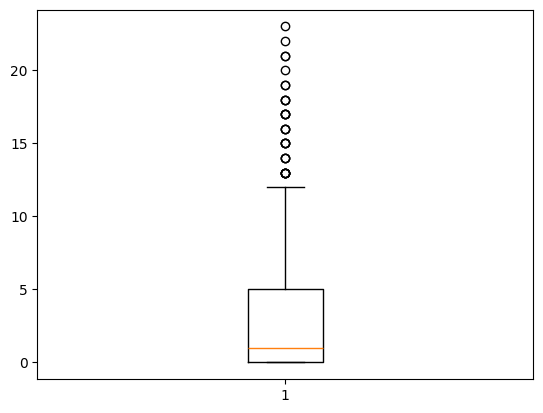

In [46]:
plt.boxplot(distro_CST)

In [47]:
distro_WPR = []
for s in range(len(sentences_WPR)):
    index = 0
    for token in sentences_WPR[s]:
        #print(token['form'], "=>", token['upos'])
        if token['form'].lower() == 'that':
            k = 1  # distance between 'that' and the 'noun' before it
            while True:
                if k >= len(sentences_WPR[s]):
                    k = 0
                    break
                if (sentences_WPR[s][index - k]['xpos'] == 'NN') or (sentences_WPR[s][index - k]['xpos'] == 'NNS'):
                    break
                else:
                    k += 1
            if k != 0:
                distro_WPR.append(k-1)
        index += 1

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe33484c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe33487500>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe33487230>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe33486b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe33486150>],
 'means': []}

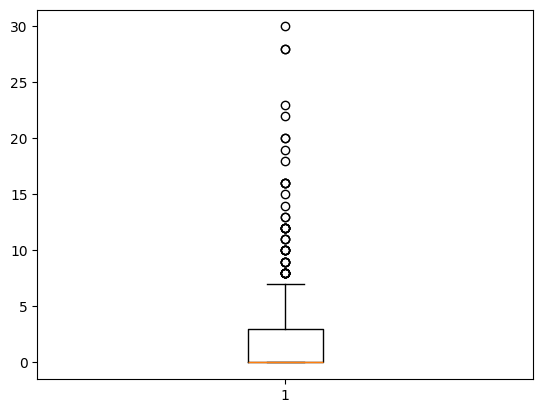

In [48]:
plt.boxplot(distro_WPR)

In [49]:
import seaborn as sns

In [50]:
labels = ['WPR' for _ in range(len(distro_WPR))]
#labels.append(['CST' for _ in range(len(distro_CST))])

In [51]:
labels = ['WPR' for _ in range(len(distro_WPR))] + ['CST' for _ in range(len(distro_CST))]

In [52]:
distro_df = pd.DataFrame({'Distance (i.e. n_tokens)': distro_WPR + distro_CST, 'Tag': labels})

<Axes: xlabel='Tag', ylabel='Distance (i.e. n_tokens)'>

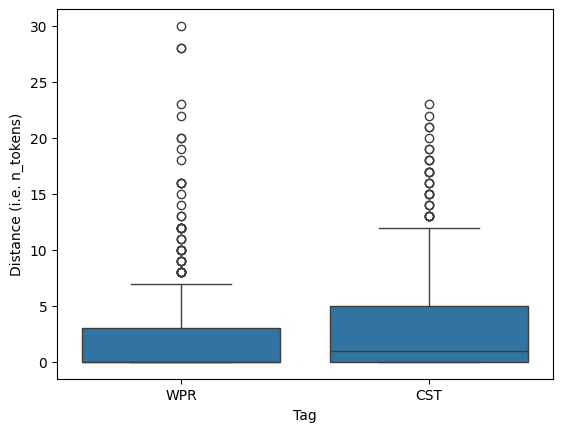

In [53]:
sns.boxplot(x = distro_df['Tag'], y=distro_df['Distance (i.e. n_tokens)'])

### Grouping the 500 training files into 5 files (respectively 100, 200, 300, 400 and 500 files per group):

In [54]:
import os

def concat_n_first(n):
    c = 0
    
    # Créer le dossier GROUPED_FILES si il n'existe pas
    output_dir = "brown_annotated/TOKEN_PER_ROW/GROUPED_FILES"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Ouverture du fichier de sortie
    with open(f"{output_dir}/{n}.txt", "w+", encoding="UTF-8") as grp_fo:
        for filename in os.listdir("brown_annotated/TOKEN_PER_ROW"):
            if os.path.isfile(f"brown_annotated/TOKEN_PER_ROW/{filename}"):
                with open(f"brown_annotated/TOKEN_PER_ROW/{filename}", "r", encoding="UTF-8") as data:
                    content = data.read()
                    grp_fo.write(content)
                    c += 1

                # Arrêter après avoir ajouté n fichiers
                if c == n:
                    break


In [55]:
concat_n_first(10)

In [56]:
concat_n_first(30)

In [57]:
concat_n_first(100)

In [58]:
concat_n_first(200)

In [79]:
concat_n_first(300)

In [59]:
concat_n_first(400)

In [60]:
concat_n_first(500)

### Creation of the `lexicon` file:

<u>Note:</u> 

This file (according to the documentation) has to follow some rules:

    1 - No duplication of terms.
    
    2 - All the possible XPOS tags of a term have to appear in the same row as the term.
    
    3 - It must include lemmas.

In [61]:
import os
import conllu

def lexicon_n_first(n):
    c = 0
    nb_that_reannoted = 0
    nb_that = 0
    
    # Create lexicon file for writing
    with open(f"brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_{n}.txt", "w+", encoding="utf-8") as lexicon_fo:
        lexicon_dict = dict()

        # Iterate over files in the directory
        for filename in os.listdir("brown_annotated/"):
            file_path = os.path.join("brown_annotated/", filename)
            if os.path.isfile(file_path):
                # Read the file and parse it
                with open(file_path, 'r', encoding='utf-8') as data:
                    annotations = data.read()
                    sentences = conllu.parse(annotations)

                    # Process each sentence and re-annotate 'that' where necessary
                    for sentence in sentences:
                        for j, token in enumerate(sentence):
                            # Re-annotate 'that' in specific cases
                            if token['xpos'] == 'VB' and token['deprel'] == 'acl':
                                # Search backwards to find 'that'
                                k = j
                                while k >= 0:
                                    if sentence[k]['form'].lower() == 'that' and sentence[k]['upos'] == 'SCONJ':
                                        nb_that_reannoted += 1
                                        sentence[k]['xpos'] = "CST"
                                    k -= 1
                            elif token['xpos'] == 'VB' and token['deprel'] == 'acl:relcl':
                                # Search backwards for relative clause 'that'
                                k = j
                                while k >= 0:
                                    if sentence[k]['form'].lower() == 'that':
                                        nb_that_reannoted += 1
                                        sentence[k]['xpos'] = "WPR"
                                    k -= 1

                    # Process each sentence and collect tokens for lexicon
                    for sentence in sentences:
                        for token in sentence:
                            # Count occurrences of 'that'
                            if token['form'].lower() == 'that':
                                nb_that += 1

                            # Check for missing 'xpos' or 'lemma'
                            xpos = token.get('xpos')
                            lemma = token.get('lemma')

                            if xpos and lemma:
                                # Add to lexicon if not already present
                                token_form = token['form'].lower()
                                entry = f"{xpos} {lemma.lower()}"

                                if token_form not in lexicon_dict:
                                    lexicon_dict[token_form] = [entry]
                                elif entry not in lexicon_dict[token_form]:
                                    lexicon_dict[token_form].append(entry)
                            else:
                                print(f"Skipping token with missing 'xpos' or 'lemma': {token['form']}")

                c += 1
                if c == n:
                    break

        # Write the lexicon to the file
        for token, entries in lexicon_dict.items():
            lexicon_fo.write(f"{token}\t" + "\t".join(entries) + "\n")

        # Additional lexicon entries (common symbols, etc.)
        lexicon_fo.write("PDT\tPDT PDT\n")
        lexicon_fo.write("''\t'' ''\n")
        lexicon_fo.write("SYM\tSYM SYM\n")
        lexicon_fo.write("$\t$ $\n")
    
    # Print results about 'that' and 'that' re-annotations
    print(f"There are {nb_that} 'that'")
    print(f"There are {nb_that_reannoted} 'that' re-annotated")



### Creation of the grouped lexicons from the grouped files (repectively 10, 15, 20, 25 and 30 per group):

In [62]:
lexicon_n_first(10)

Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Department's
Skipping token with missing 'xpos' or 'lemma': ordinary's
Skipping token with missing 'xpos' or 'lemma': court's
Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Commissioner's
Skipping token with missing 'xpos' or 'lemma': wife's
Skipping token with missing 'xpos' or 'lemma': governor's
Skipping token with missing 'xpos' or 'lemma': Byrd's
Skipping token with missing 'xpos' or 'lemma': Caldwell's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Saturday's
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos

In [63]:
lexicon_n_first(30)

Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Department's
Skipping token with missing 'xpos' or 'lemma': ordinary's
Skipping token with missing 'xpos' or 'lemma': court's
Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Commissioner's
Skipping token with missing 'xpos' or 'lemma': wife's
Skipping token with missing 'xpos' or 'lemma': governor's
Skipping token with missing 'xpos' or 'lemma': Byrd's
Skipping token with missing 'xpos' or 'lemma': Caldwell's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Saturday's
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos

In [64]:
lexicon_n_first(100)

Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Department's
Skipping token with missing 'xpos' or 'lemma': ordinary's
Skipping token with missing 'xpos' or 'lemma': court's
Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Commissioner's
Skipping token with missing 'xpos' or 'lemma': wife's
Skipping token with missing 'xpos' or 'lemma': governor's
Skipping token with missing 'xpos' or 'lemma': Byrd's
Skipping token with missing 'xpos' or 'lemma': Caldwell's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Saturday's
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos

In [65]:
lexicon_n_first(200)

Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Department's
Skipping token with missing 'xpos' or 'lemma': ordinary's
Skipping token with missing 'xpos' or 'lemma': court's
Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Commissioner's
Skipping token with missing 'xpos' or 'lemma': wife's
Skipping token with missing 'xpos' or 'lemma': governor's
Skipping token with missing 'xpos' or 'lemma': Byrd's
Skipping token with missing 'xpos' or 'lemma': Caldwell's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Saturday's
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos

In [66]:
lexicon_n_first(300)

Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Department's
Skipping token with missing 'xpos' or 'lemma': ordinary's
Skipping token with missing 'xpos' or 'lemma': court's
Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Commissioner's
Skipping token with missing 'xpos' or 'lemma': wife's
Skipping token with missing 'xpos' or 'lemma': governor's
Skipping token with missing 'xpos' or 'lemma': Byrd's
Skipping token with missing 'xpos' or 'lemma': Caldwell's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Saturday's
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos

In [67]:
lexicon_n_first(400)

Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Department's
Skipping token with missing 'xpos' or 'lemma': ordinary's
Skipping token with missing 'xpos' or 'lemma': court's
Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Commissioner's
Skipping token with missing 'xpos' or 'lemma': wife's
Skipping token with missing 'xpos' or 'lemma': governor's
Skipping token with missing 'xpos' or 'lemma': Byrd's
Skipping token with missing 'xpos' or 'lemma': Caldwell's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Saturday's
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos

In [68]:
lexicon_n_first(500)

Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Department's
Skipping token with missing 'xpos' or 'lemma': ordinary's
Skipping token with missing 'xpos' or 'lemma': court's
Skipping token with missing 'xpos' or 'lemma': Atlanta's
Skipping token with missing 'xpos' or 'lemma': Commissioner's
Skipping token with missing 'xpos' or 'lemma': wife's
Skipping token with missing 'xpos' or 'lemma': governor's
Skipping token with missing 'xpos' or 'lemma': Byrd's
Skipping token with missing 'xpos' or 'lemma': Caldwell's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Georgia's
Skipping token with missing 'xpos' or 'lemma': Saturday's
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos' or 'lemma': didn't
Skipping token with missing 'xpos

## Training:

In [94]:
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_10.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/10.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_10.par


train-tree-tagger -cl 2 -dtg 0.50 -sw 1.00 -ecw 0.15 -atg 1.20 brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_10.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/10.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_10.par

	reading the lexicon ...
		reading the tagset ...
		reading the lemmas ...
		reading the entries ...
		sorting the lexicon ...
		reading the open class tags ...
	calculating tag frequencies ...

ERROR: unknown tag <None> !



In [95]:
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_30.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/30.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_30.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_100.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/100.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_100.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_200.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/200.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_200.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_300.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/300.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_300.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_400.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/400.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_400.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_500.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/500.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_500.par


train-tree-tagger -cl 2 -dtg 0.50 -sw 1.00 -ecw 0.15 -atg 1.20 brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_30.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/30.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_30.par

	reading the lexicon ...
		reading the tagset ...
		reading the lemmas ...
		reading the entries ...

ERROR: Tag "VBZ" replicated in lexicon entry for "'s" at line 12

train-tree-tagger -cl 2 -dtg 0.50 -sw 1.00 -ecw 0.15 -atg 1.20 brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_100.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/100.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_100.par

	reading the lexicon ...
		reading the tagset ...
		reading the lemmas ...
		reading the entries ...

ERROR: Tag "JJ" replicated in lexicon entry for "said" at line 6

train-tree-tagger -cl 2 -dtg 0.50 -sw 1.00 -ecw 0.15 -atg 1.20 brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_200.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/2

### Tokenization of the test sets `RRC` et `NCC` and transform into the token per row format:

In [99]:
with open("testing_sets/NNC_test_text.txt", "r", encoding="utf-8") as fo:
    content = fo.read()
    tokens = content.split(" ")
    with open("testing_sets/NCC_tokenized.txt", "w+", encoding="utf-8") as fo_tokenized:
        for token in tokens:
            fo_tokenized.write(token + "\n")

In [106]:
with open("testing_sets/RCC_test_text.txt", "r", encoding="utf-8") as fo:
    content = fo.read()
    tokens = content.split(" ")
    with open("testing_sets/RCC_tokenized.txt", "w+", encoding="utf-8") as fo_tokenized:
        for token in tokens:
            fo_tokenized.write(token + "\n")

## Testing:

### <u>On the RRC dataset</u>:

In [109]:
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_10.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_10.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_30.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_30.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_100.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_100.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_200.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_200.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_300.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_300.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_400.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_400.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_500.par testing_sets/RRCutf8_tokenized.txt RESULTS_RRC/results_500.txt

	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_10.par
aborted.
	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_30.par
aborted.
	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_100.par
aborted.
	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_200.par
aborted.
	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_300.par
aborted.
	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_400.par
aborted.
	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_500.par
aborted.


### <u>NCC dataset</u>:

In [111]:
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_10.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_10.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_30.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_30.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_100.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_100.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_200.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_200.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_300.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_300.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_400.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_400.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_500.par testing_sets/NCC_tokenized.txt RESULTS_NCC/results_500.txt

	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_10.par
aborted.
	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_30.par
aborted.
	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_100.par
aborted.
	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_200.par
aborted.
	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_300.par
aborted.
	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_400.par
aborted.
	reading parameters ...

ERROR: Can't open for reading: brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/model_500.par
aborted.


## Compute the accuracy:

### <u>RRC:</u>

In [114]:
import os

path = "RESULTS_RRC/"
nbr = [10, 30, 100, 200, 300, 400, 500]
n_results = {}

# Ensure the directory exists
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for n in nbr:
        file_path = path + "results_" + str(n) + ".txt"
        
        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                tmp = {
                    'n_WPR': content.count("that\tWPR"),
                    'n_WDT': content.count("that\tWDT"),
                    'n_CST': content.count("that\tCST"),
                    'n_IN': content.count("that\tIN"),
                    'n_CJT': content.count("that\tCJT"),
                    'n_DT': content.count("that\tDT")
                }
            n_results[str(n)] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")
    
    # You can now print or further process `n_results` as needed
    print(n_results)


File 'RESULTS_RRC/results_10.txt' not found. Skipping...
File 'RESULTS_RRC/results_30.txt' not found. Skipping...
File 'RESULTS_RRC/results_100.txt' not found. Skipping...
File 'RESULTS_RRC/results_200.txt' not found. Skipping...
File 'RESULTS_RRC/results_300.txt' not found. Skipping...
File 'RESULTS_RRC/results_400.txt' not found. Skipping...
File 'RESULTS_RRC/results_500.txt' not found. Skipping...
{}


The WPR tag is equivalent to the WDT so we consider them the same.

As explained before, we suppose that the UDpipe gives a correct deprel. There is probably some mistakes which are described as `IN` tag.

In [115]:
import matplotlib.pyplot as plt
import numpy as np

In [117]:
print(n_results)  # Check the structure and data of n_results


{}


In [118]:
accuracy_rcc = [(v['n_WPR'] + v['n_WDT'])/200 for k, v in n_results.items()]
print(accuracy_rcc)  # Check the calculated values of accuracy_rcc


[]


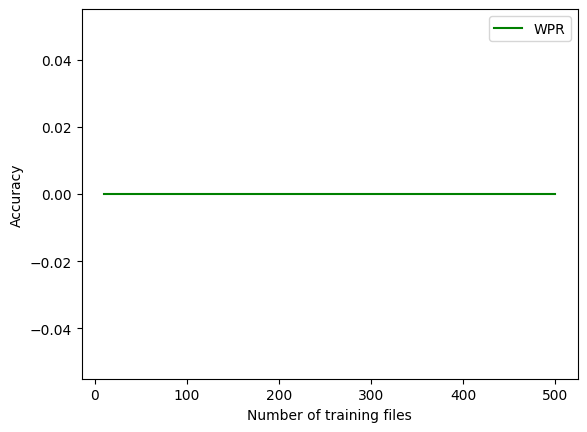

In [119]:
accuracy_rcc = []

# Populate accuracy_rcc only if the corresponding entry exists in n_results
for n in nbr:
    if str(n) in n_results:  # Ensure there's data for this n value
        accuracy_rcc.append((n_results[str(n)]['n_WPR'] + n_results[str(n)]['n_WDT']) / 200)
    else:
        accuracy_rcc.append(0)  # Or some other default value for missing data

# Now plot the graph
plt.plot(nbr, accuracy_rcc, "g", label="WPR")
plt.xlabel("Number of training files")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("WPR_accuracy.png")


### Confusion Matrix:

In [ ]:
fo = open("RRC_GOLD.txt", encoding="utf-8", mode="r")
content = fo.read()
fo.close()
tokens = content.split(" ")

In [362]:
that_positions = []
for token in tokens:
    elts = token.split("|")
    if elts[0].lower() == "that":
        that_positions.append(elts[1])

In [14]:
from sklearn import metrics

In [366]:
that_pos_files = {}
cm_files = {}
for i in [10, 30, 100, 200, 300, 400, 500]:
    fo = open("RESULTS_RRC/results_"+str(i)+".txt", encoding="utf-8", mode="r")
    content = fo.read()
    fo.close()
    tokens_treetagger = content.split("\n")
    
    that_positions_tt = []
    for token in tokens_treetagger:
        elts = token.split("\t")
        if elts[0].lower() == "that":
            that_positions_tt.append(elts[1])
    that_pos_files[str(i)] = that_positions_tt
    cm_files[str(i)] = metrics.confusion_matrix(that_positions, that_positions_tt, labels=['CST', 'DT', 'IN', 'WDT', 'WPR'])

10
30
100
200
300
400
500


<Figure size 864x576 with 0 Axes>

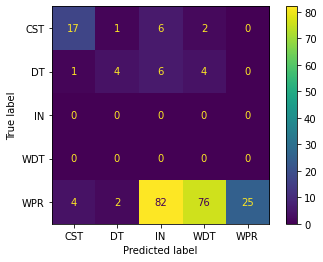

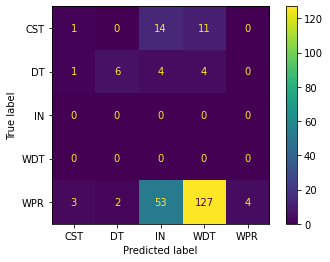

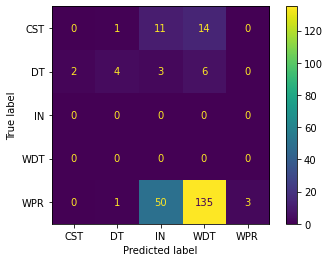

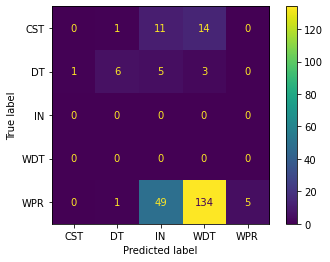

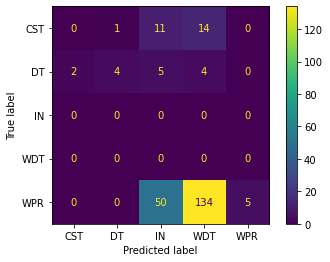

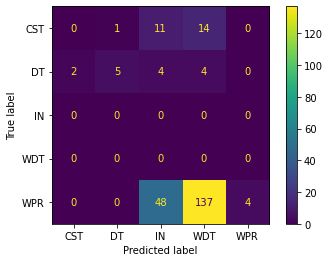

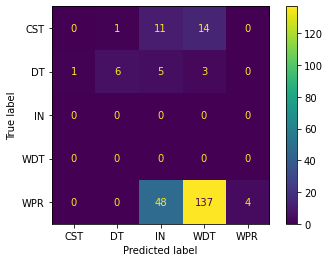

In [368]:
li = [10, 30, 100, 200, 300, 400, 500]
plt.figure(figsize=(12, 8))
for i in range(7):
    metrics.ConfusionMatrixDisplay(cm_files[str(li[i])], display_labels=['CST', 'DT', 'IN', 'WDT', 'WPR']).plot()

#### Print the sentences where `that` annotation is wrong: 

In [374]:
that_positions_tt = that_pos_files['100']

In [375]:
fo = open("testing_sets/RRC_CLEAN.conllu", mode="r")
annotations = fo.read()
fo.close()
sentences = conllu.parse(annotations)

In [376]:
idx_sents = []
for i in range(len(sentences)):
    c_that = sentences[i].metadata['text'].count("that")
    k = 1
    while(k <= c_that):
        idx_sents.append((i, k, c_that))
        k += 1

In [377]:
i = 0
wrong_sents = []
while i < len(that_positions):
    id_sent = idx_sents[i][0]
    pos_that_in_sent = idx_sents[i][1]
    nb_that = idx_sents[i][2]
    text = sentences[id_sent].metadata['text']
    text = text.split(" ")
    k = i
    indices_that_in_sent = [ind for ind, x in enumerate(text) if "that" == x.lower()]
    while k < (i + nb_that):
        if not((that_positions[k] == "WPR" and that_positions_tt[k] == "WDT") or (that_positions_tt[k] == "WPR" and that_positions[k] == "WDT")):
            if that_positions[k] != that_positions_tt[k]:
                text[indices_that_in_sent[k-i]] = (text[indices_that_in_sent[k-i]] + "|" + that_positions_tt[k] + "|" + that_positions[k])

        k += 1
    sentences[id_sent].metadata['text'] = " ".join(text)
    i = k
    if nb_that == 0:
        i += 1

In [378]:
with open("wrong_that_sentences_RRC.txt", mode="w+", encoding="utf-8") as fo:
    fo.writelines(list(map(lambda x: x.metadata['text']+"\n\n", sentences)))

### <u>NCC:</u>

In [1]:
path = "RESULTS_NCC/"
nbr = [10, 30, 100, 200, 300, 400, 500]
n_results = {}

for n in nbr:
    with open(path + "results_" + str(n) + ".txt", "r", encoding="UTF-8") as fo:
        content = fo.read()
        tmp = {
        'n_WPR' : content.count("that\tWPR"),
        'n_WDT' : content.count("that\tWDT"),
        'n_CST' : content.count("that\tCST"),
        'n_IN' : content.count("that\tIN"),
        'n_CJT' : content.count("that\tCJT"),
        'n_DT' : content.count("that\tDT")
        }
    n_results[str(n)] = tmp

There is a lot of noise (see `DT` tag), this may be du to the fact that there are a lot of *that*s that aren't considered as **acl** by the UDpipe. 

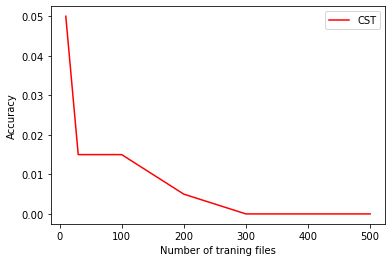

In [5]:
accuracy_ncc = [(v['n_CST'])/200 for k, v in n_results.items()]
plt.plot(nbr, accuracy_ncc, 'r', label="CST")
plt.xlabel("Number of traning files")
plt.ylabel("Accuracy")
plt.legend()

Text(0, 0.5, 'Number of IN')

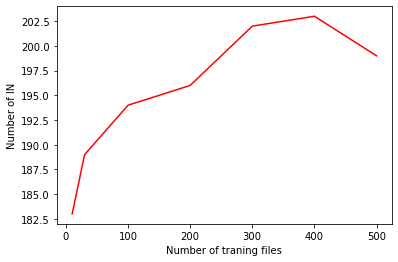

In [6]:
accuracy_ncc = [(v['n_IN']) for k, v in n_results.items()]
plt.plot(nbr, accuracy_ncc, 'r')
plt.xlabel("Number of traning files")
plt.ylabel("Number of IN")

### Confusion Matrix:

In [12]:
fo = open("RRC_GOLD.txt", encoding="utf-8", mode="r")
content = fo.read()
fo.close()
tokens = content.split(" ")

that_positions = []
for token in tokens:
    elts = token.split("|")
    if elts[0].lower() == "that":
        that_positions.append(elts[1])

fo = open("RESULTS_RRC/results_100.txt", encoding="utf-8", mode="r")
content = fo.read()
fo.close()
tokens_treetagger = content.split("\n")

that_positions_tt = []
for token in tokens_treetagger:
    elts = token.split("\t")
    if elts[0].lower() == "that":
        that_positions_tt.append(elts[1])

<Figure size 864x576 with 0 Axes>

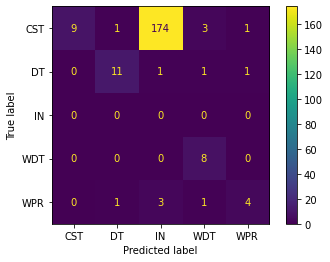

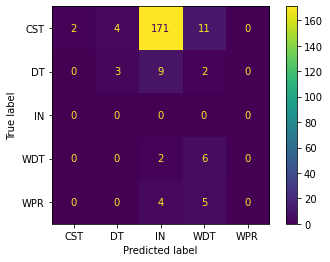

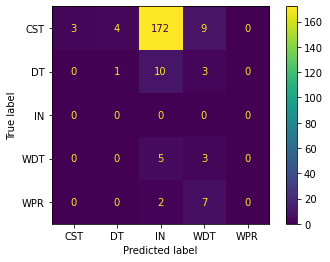

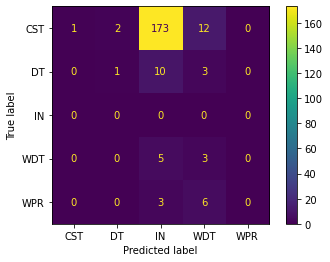

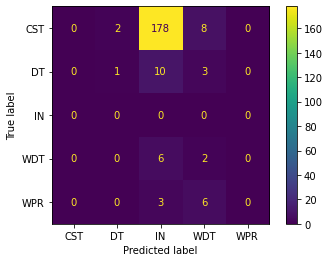

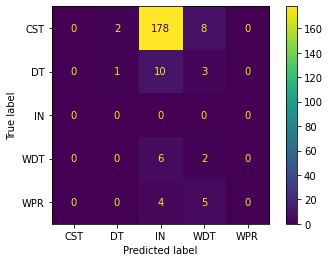

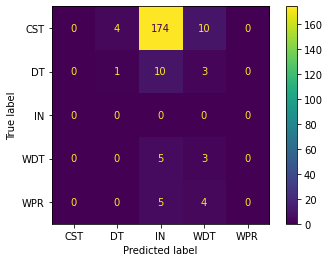

In [9]:
# We compute the confusion matrix for each of the NCC results with 10, 30, 100, 200, 300, 400 and 500 files
fo = open("NCC_GOLD.txt", encoding="utf-8", mode="r")
content = fo.read()
fo.close()
tokens = content.split(" ")

that_positions = []
for token in tokens:
    elts = token.split("|")
    if elts[0].lower() == "that":
        that_positions.append(elts[1])

that_pos_files = {}
cm_files = {}
for i in [10, 30, 100, 200, 300, 400, 500]:
    fo = open("RESULTS_NCC/results_"+str(i)+".txt", encoding="utf-8", mode="r")
    content = fo.read()
    fo.close()
    tokens_treetagger = content.split("\n")
    
    that_positions_tt = []
    for token in tokens_treetagger:
        elts = token.split("\t")
        if elts[0].lower() == "that":
            that_positions_tt.append(elts[1])
    that_pos_files[str(i)] = that_positions_tt
    cm_files[str(i)] = metrics.confusion_matrix(that_positions, that_positions_tt, labels=['CST', 'DT', 'IN', 'WDT', 'WPR'])

li = [10, 30, 100, 200, 300, 400, 500]
plt.figure(figsize=(12, 8))
for i in range(7):
    metrics.ConfusionMatrixDisplay(cm_files[str(li[i])], display_labels=['CST', 'DT', 'IN', 'WDT', 'WPR']).plot()

In [10]:
# we consider 100 training files as it produces the best accuracy for the NCC test data
that_positions_tt = that_pos_files['500']

#### Print the sentences where `that` annotation is wrong: 

In [16]:
def countnonoverlappingrematches(pattern, thestring):
    return re.subn(pattern, '', thestring)[1]

In [29]:
fo = open("testing_sets/NCC_CLEAN.conllu", mode="r")
annotations = fo.read()
fo.close()
sentences = conllu.parse(annotations)

idx_sents = []
for i in range(len(sentences)):
    c_that = sentences[i].metadata['text'].count("that")
    k = 1
    while(k <= c_that):
        idx_sents.append((i, k, c_that))
        k += 1
        
i = 0
wrong_sents = []
while i < len(that_positions):
    id_sent = idx_sents[i][0]
    pos_that_in_sent = idx_sents[i][1]
    nb_that = idx_sents[i][2]
    text = sentences[id_sent].metadata['text']
    text = text.split(" ")
    k = i
    indices_that_in_sent = [ind for ind, x in enumerate(text) if "that" in x.lower()]
    while k < (i + nb_that):
        if not((that_positions[k] == "WPR" and that_positions_tt[k] == "WDT") or (that_positions_tt[k] == "WPR" and that_positions[k] == "WDT")):
#            if that_positions[k] != that_positions_tt[k]:
                text[indices_that_in_sent[k-i]] = (text[indices_that_in_sent[k-i]] + "|" + that_positions_tt[k] + "|" + that_positions[k])

        k += 1
    sentences[id_sent].metadata['text'] = " ".join(text)
    i = k
    if nb_that == 0:
        i += 1
        
with open("wrong_that_sentences_NCC.txt", mode="w+", encoding="utf-8") as fo:
    fo.writelines(list(map(lambda x: "" if countnonoverlappingrematches(r"that\|WDT\|[^WDT ]+", x.metadata['text']) == 0 else x.metadata['text']+"\n\n", sentences)))

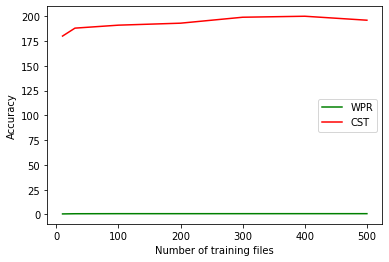

In [95]:
plt.plot(nbr, accuracy_rcc, 'g', label="WPR")
plt.plot(nbr, accuracy_ncc, 'r', label="CST")
plt.xlabel("Number of training files")
plt.ylabel("Accuracy")
plt.legend()

## Bonus: Analysis of *That* in Nominal Complements
- Study the incorporation of the [+singular] or [+plural] feature using tools like *skweak* for feature engineering.
- Analyze *that* as a pronoun in sentences like *I love that!*.